<a href="https://colab.research.google.com/github/insh-samnani/The-Sparks-Foundation-Internship/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NAME**: INSHA SAMNANI
#### **TASK2**: Predicting the optimum number of clusters for "Iris" Dataset using UNSUPERVISED Machine Learning.
#### **DATASET LINK**: https://bit.ly/3kXTdox

In [ ]:
#Upload CSV File from your PC/Laptop

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Iris.csv to Iris (1).csv
User uploaded file "Iris.csv" with length 5107 bytes


In [ ]:
#Importing Libraries

import io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [ ]:
#Creating DataFrame

iris = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

In [ ]:
#Displaying first five records of the "Iris" dataset

iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


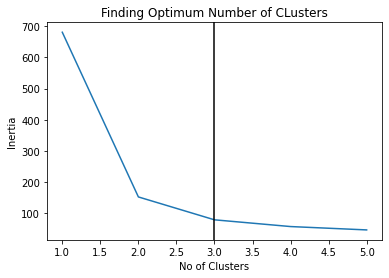

In [ ]:
#Finding optimum number of clusters

iris1=iris.iloc[:,[1,2,3,4]] #Copying 4 measuring columns of our dataset in a new dataset
clusters=range(1,6) #Setting range of clusters to be checked to decide the best choice
inertia=[] #Declaring an empty list of "Inertia"
for k in clusters: #Looping through each value of "clusters"
  model=KMeans(n_clusters=k) #Initiating the model by using KMeans algorithm
  model.fit(iris1) #Fitting our model to newly created dataset "iris1"
  inertia.append(model.inertia_) #Calculating the inertia for that model and appending in the list of "inertia"
plt.plot(clusters,inertia) #Plotting "inerta" vs "clusters" to apply the rule of elbow
plt.xlabel("No of Clusters") #Setting xlabel
plt.ylabel("Inertia") #Setting ylabel
plt.title("Finding Optimum Number of CLusters") #Setting title
plt.axvline(x=3.0,color='Black') #Highlighting the no of cluster that is optimum in our case
plt.show() #Displaying the plot

#By the rule of elbow, we are able to decide that after 3 clusters, Inertia begins to decrease slowly, and thus we can set our clusters to "3"

In [ ]:
#After finding 3 as our optimum number of clusters, we are now clustering our data and applying cross tabulation to check how are data spread over the labels

iris1_arr=iris1.to_numpy() #Converting the "iris1" dataset to numpy 2-D array
model=KMeans(n_clusters=3) #Initiating the model by using KMeans algorithm with n_clusters=3
model.fit(iris1_arr) #Fitting our model to newly created array "iris1_arr"
labels=model.predict(iris1_arr) #Predicting our model with newly created array "iris1_arr"
species=iris["Species"] #Initializing species to evaluate the clustering of our dataset
df=pd.DataFrame({'labels':labels,'species':species}) #Creating another dataset to evaluate the clustering of our dataset
ct=pd.crosstab(df['labels'],df['species']) #Creating cross tabulation to visualize the clustering of our dataset in a tabular form
print(ct) #Printing the cross tabulation

#As we can see that "Setosa" samples purely lies within label1 and "Versicolor" samples lies within label2 with their 2 samples lying in label0. However, "Virginica" 36 samples lies in label0 and 14 samples lies in label2. It seems to be a good model but can we further make it more better?

species  Iris-setosa  Iris-versicolor  Iris-virginica
labels                                               
0                  0               48              14
1                 50                0               0
2                  0                2              36


In [ ]:
#For that we can Normalize our dataset before applying "KMeans" Algorithm to transform each feature having mean 0 and variance 1. Results are quite surprising!!!

normalize=Normalizer() #Initiating the normalize by using "Normalizer()"
kmeans=KMeans(n_clusters=3)
pipeline=make_pipeline(normalize,kmeans) #Piping it with kmeans
pipeline.fit(iris1_arr) #Applying exactly same method as above but this time on "pipeline"
labels=pipeline.predict(iris1_arr)
species=iris["Species"]
df=pd.DataFrame({'labels':labels,'species':species})
ct=pd.crosstab(df['labels'],df['species'])
print(ct)

species  Iris-setosa  Iris-versicolor  Iris-virginica
labels                                               
0                 50                0               0
1                  0                5              50
2                  0               45               0


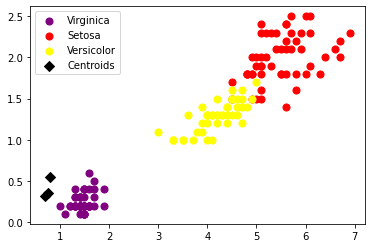

In [ ]:
#Now we are visualizing the clusters for last two columns of 2-D array "iris1_arr"

label1_x=iris1_arr[labels==0,2] #Created an array having samples of label0 for column 3
label1_y=iris1_arr[labels==0,3] #Created an array having samples of label0 for column 4
label2_x=iris1_arr[labels==1,2] #Created an array having samples of label1 for column 3
label2_y=iris1_arr[labels==1,3] #Created an array having samples of label1 for column 4
label3_x=iris1_arr[labels==2,2] #Created an array having samples of label2 for column 3
label3_y=iris1_arr[labels==2,3] #Created an array having samples of label2 for column 4
plt.scatter(label1_x,label1_y,color='purple',label='Virginica',s=50) #Scatter plot of label1 for column4 vs column3
plt.scatter(label2_x,label2_y,color='red',label='Setosa',s=50) #Scatter plot of label2 for column4 vs column3
plt.scatter(label3_x,label3_y,color='yellow',label='Versicolor',s=50) #Scatter plot of label3 for column4 vs column3
centroids=kmeans.cluster_centers_ #Calculating mean for samples of each cluster, called as centroids
centroids_x=centroids[:,0] #Storing the absicca of the centroids
centroids_y=centroids[:,1] #Storing the ordinates of the centroids
plt.scatter(centroids_x,centroids_y,marker='D',s=50,c="Black",label='Centroids') #Scatter plot of centroids
plt.legend() #Adding a legend to our plot
plt.show() #Displaying the plot